In [1]:
import json
import os
import sys

sys.path.append('/home/luis/CGE/luxgiant-dstream/luxgiant_dstream')

from luxgiant_dstream.prep_ds import PrepDS
from luxgiant_dstream.gwas_fixed import GWASfixed
from luxgiant_dstream.gwas_random import GWASrandom

In [2]:
#params = json.load(open("//home/luis/data/testDownStream/configFiles/parameters.JSON"))
#paths = json.load(open("/home/luis/data/testDownStream/configFiles/paths_local.JSON"))

params = json.load(open("//home/luis/data/LuxGiantimputed/configFiles/parameters.JSON"))
paths = json.load(open("/home/luis/data/LuxGiantimputed/configFiles/paths_local.JSON"))

In [3]:
#prep = PrepDS(
#    input_path=paths['input_directory'],
#    input_name=paths['input_prefix'],
#    output_path=paths['output_directory'],
#    output_name=paths['output_prefix'],
#    config_dict=params,
#    dependables_path=paths['dependables_directory'],
#)

In [3]:
#prep_steps = {
#    'ld_prune': prep.exclude_high_ld_hla,
#    'pca'     : prep.pca_decomposition
#}
#
#for step in prep_steps.keys():
#    prep_steps[step]()

In [3]:
gwas_f = GWASfixed(
    input_path = paths['input_directory'],
    input_name = paths['input_prefix'],
    output_path= paths['output_directory'],
    output_name= paths['output_prefix'],
    dependables= paths['dependables_directory'],
    config_dict= params,
    preps_path = os.path.join(paths['output_directory'], 'preparatory'),
)
gwas_f.compare_gwas_fixed_file_name = 'european_cohort_nallsEtAl2019_excluding23andMe_allVariants.hg38.tsv'
gwas_f.compare_gwas_fixed_highlights = 'highlighted_european_cohort_nallsEtAl2019_excluding23andMe_allVariants.hg38.csv'

Analysis of GWAS data using a fixed model initialized.


/home/luis/CGE/luxgiant-dstream/luxgiant_dstream/plots.py:360: UserWarning: 
The palette list has fewer values (2) than needed (22) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=plot_data['upper']['rel_pos'], y=plot_data['upper']['log10p'],
/home/luis/CGE/luxgiant-dstream/luxgiant_dstream/plots.py:382: UserWarning: 
The palette list has fewer values (2) than needed (22) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=plot_data['lower']['rel_pos'], y=plot_data['lower']['log10p'],


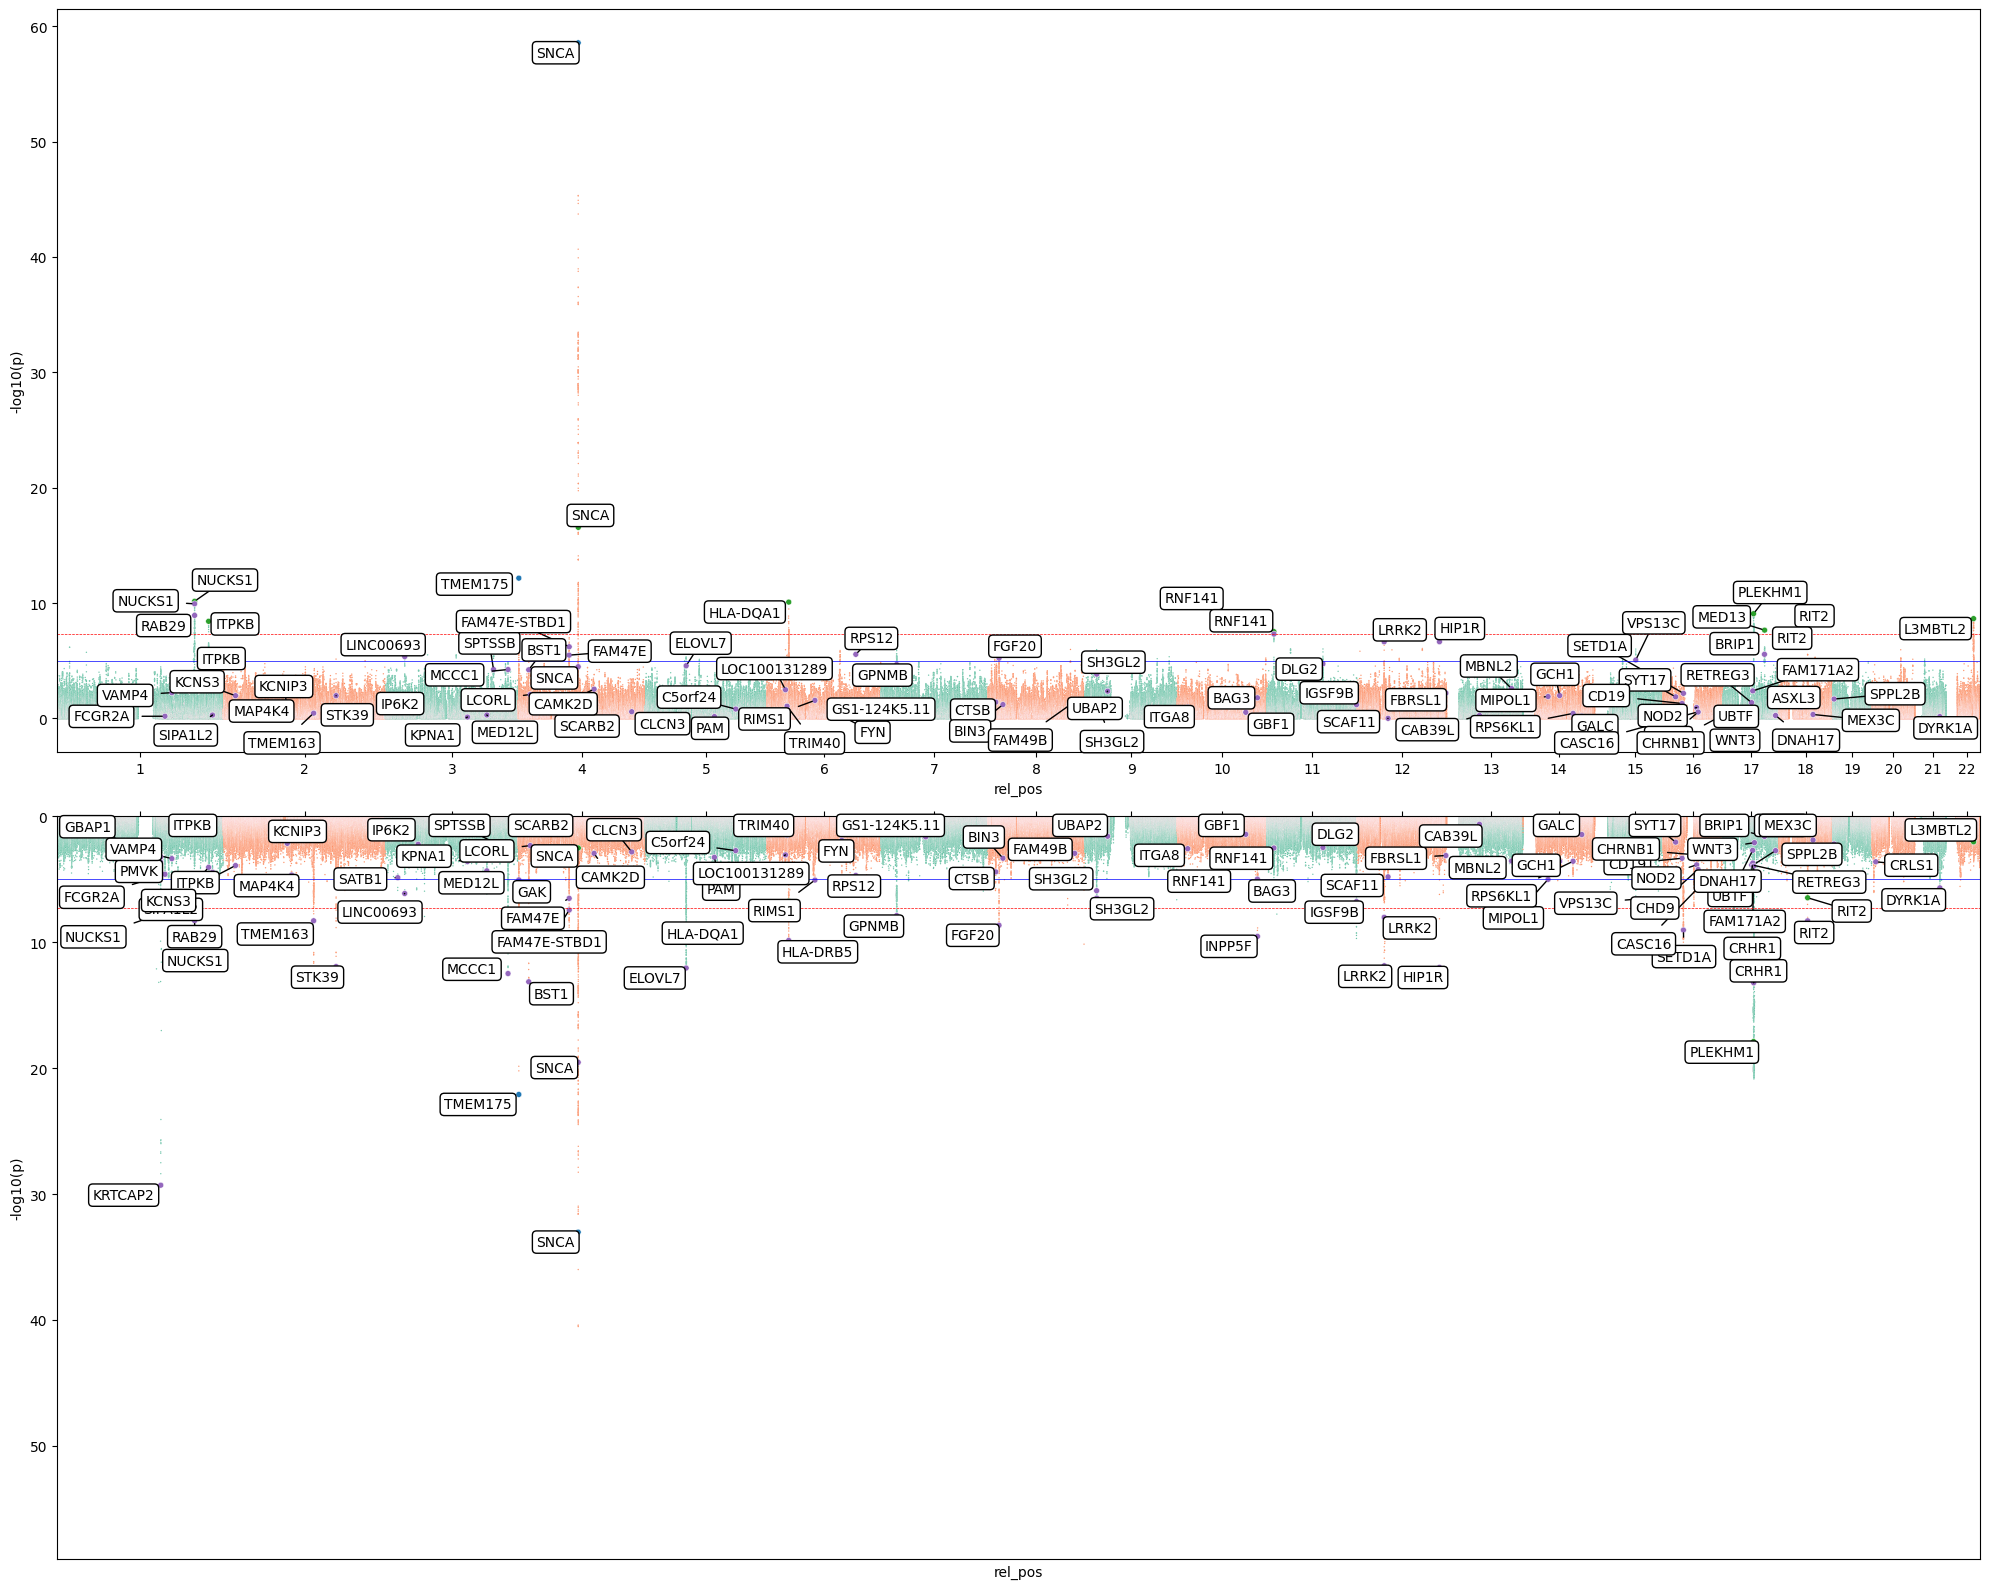

In [4]:
gwas_f_steps = {
    #'train_model': gwas_f.fixed_model_association_analysis,
    #'top_hits'   : gwas_f.get_top_hits,
    #'annotate'   : gwas_f.annotate_top_hits,
    #'plots'      : gwas_f.plot_drawings,
    'one_cohort' : gwas_f.one_cohort_comparison
}

for step in gwas_f_steps.keys():
    gwas_f_steps[step]()

In [7]:
#gwas_r = GWASrandom(
#    input_path = paths['input_directory'],
#    input_name = paths['input_prefix'],
#    output_path= paths['output_directory'],
#    output_name= paths['output_prefix'],
#    config_dict= params,
#    preps_path = os.path.join(paths['output_directory'], 'preparatory'),
#)

*******************************************************************
* Genome-wide Complex Trait Analysis (GCTA)
* version v1.94.1 Linux
* Built at Nov 15 2022 21:14:25, by GCC 8.5
* (C) 2010-present, Yang Lab, Westlake University
* Please report bugs to Jian Yang <jian.yang@westlake.edu.cn>
*******************************************************************
Analysis started at 10:24:04 CEST on Fri Sep 13 2024.
Hostname: IKEAB-TS-P3

Options: 
 
--bfile /home/luis/data/testDownStream/outputData/preparatory/ds_results_LDpruned 
--make-grm 
--thread-num 30 
--out /home/luis/data/testDownStream/outputData/gwas_random/ds_results_grm 

The program will be running with up to 30 threads.
Note: GRM is computed using the SNPs on the autosomes.
Reading PLINK FAM file from [/home/luis/data/testDownStream/outputData/preparatory/ds_results_LDpruned.fam]...
466 individuals to be included from FAM file.
466 individuals to be included. 322 males, 144 females, 0 unknown.
Reading PLINK BIM file from [/ho

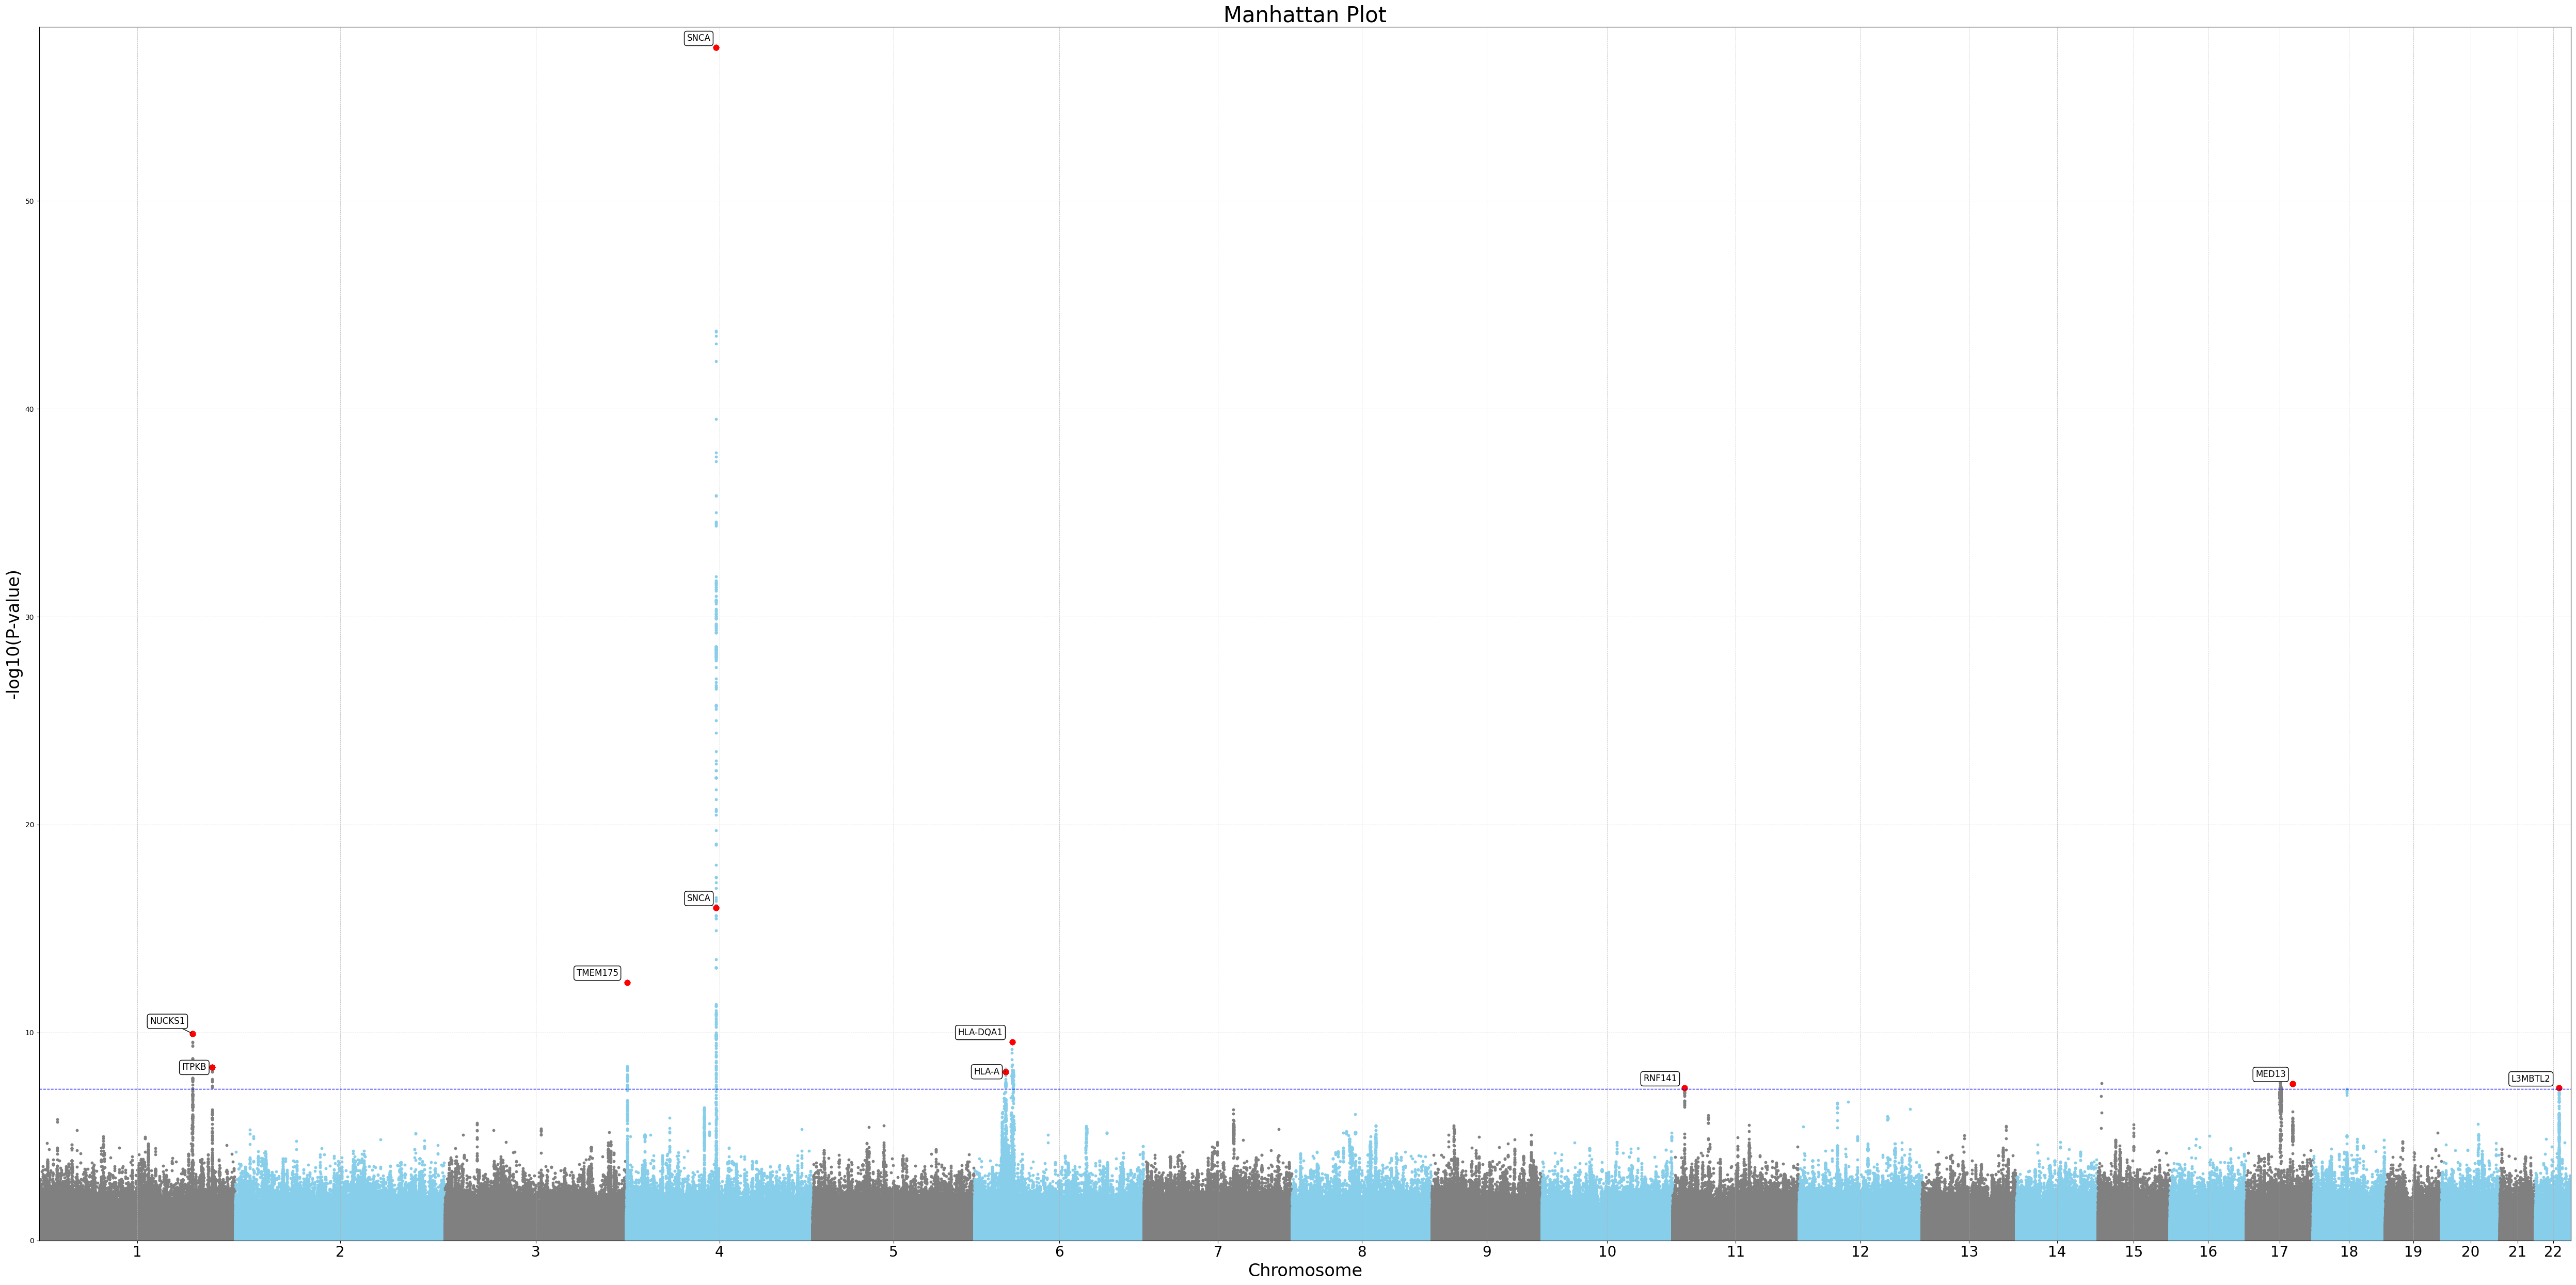

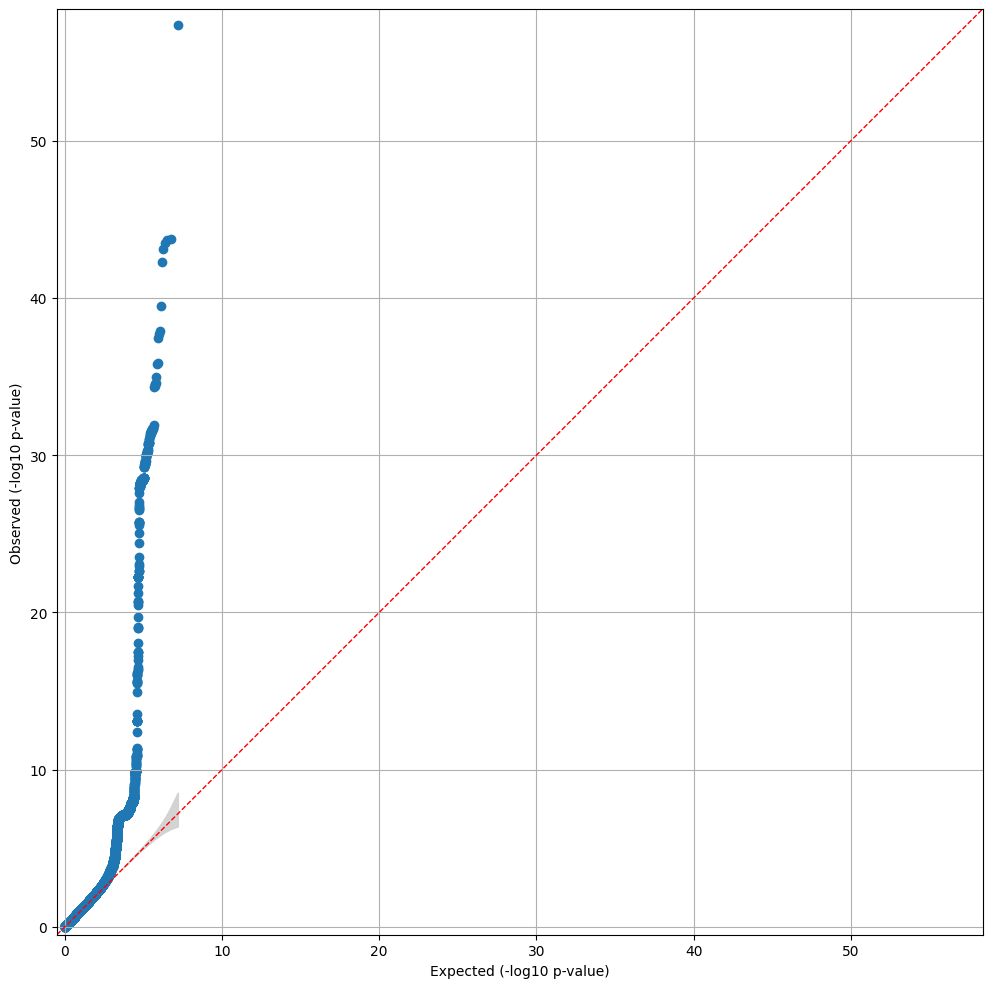

In [8]:
#gwas_r_steps = {
#    'preparatory': gwas_r.prepare_aux_files,
#    'grm'        : gwas_r.compute_grm,
#    'random'     : gwas_r.run_gwas_random,
#    'top_hits'   : gwas_r.get_top_hits,
#    'annotate'   : gwas_r.annotate_top_hits,
#    'plots'      : gwas_r.plot_drawings
#}
#for step in gwas_r_steps.keys():
#    gwas_r_steps[step]()

In [7]:
gwas_f.output_path

'/home/luis/data/LuxGiantimputed/outputData'

In [9]:
import pandas as pd

df_annot = pd.read_csv(
    os.path.join('/home/luis/data/LuxGiantimputed/outputData/gwas_fixed', "snps_annotated.csv"), 
    sep='\t'
)
df_gwas = pd.read_csv(
    os.path.join('/home/luis/data/LuxGiantimputed/outputData/gwas_fixed', "ds_results_glm.PHENO1.glm.logistic.hybrid"), 
    sep='\t'
)